<a href="https://colab.research.google.com/github/ahmadmardeni1/Parkinson-Prediction/blob/main/Parkinson_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [4]:
!kaggle datasets download -d kmader/parkinsons-drawings

 80% 33.0M/41.4M [00:00<00:00, 34.2MB/s]
100% 41.4M/41.4M [00:00<00:00, 65.3MB/s]


In [5]:
!unzip \*.zip  && rm *.zip

Archive:  parkinsons-drawings.zip
  inflating: drawings/spiral/testing/healthy/V01HE01.png  
  inflating: drawings/spiral/testing/healthy/V02HE01.png  
  inflating: drawings/spiral/testing/healthy/V03HE1.png  
  inflating: drawings/spiral/testing/healthy/V04HE01.png  
  inflating: drawings/spiral/testing/healthy/V05HE01.png  
  inflating: drawings/spiral/testing/healthy/V06HE01.png  
  inflating: drawings/spiral/testing/healthy/V07HE01.png  
  inflating: drawings/spiral/testing/healthy/V08HE01.png  
  inflating: drawings/spiral/testing/healthy/V09HE01.png  
  inflating: drawings/spiral/testing/healthy/V10HE01.png  
  inflating: drawings/spiral/testing/healthy/V11HE01.png  
  inflating: drawings/spiral/testing/healthy/V55HE12.png  
  inflating: drawings/spiral/testing/healthy/V55HE13.png  
  inflating: drawings/spiral/testing/healthy/V55HE14.png  
  inflating: drawings/spiral/testing/healthy/V55HE15.png  
  inflating: drawings/spiral/testing/parkinson/V01PE01.png  
  inflating: drawings

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
model = keras.Sequential([
        layers.Conv2D(32,(3,3),input_shape=(128, 128, 3),activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(32,(3,3),activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(activation='relu',units=128),
        layers.Dense(activation='sigmoid',units=1),
])

In [10]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                  shear_range = 0.2, 
                                  zoom_range = 0.2, 
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

spiral_train_generator = train_datagen.flow_from_directory('spiral/training',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

spiral_test_generator = test_datagen.flow_from_directory('spiral/testing',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')


Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [15]:
wave_train_generator = train_datagen.flow_from_directory('wave/training',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

wave_test_generator = test_datagen.flow_from_directory('wave/testing',
                                                   target_size = (128,128),
                                                   batch_size = 32,
                                                   class_mode = 'binary')

Found 72 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [23]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

model.compile(
    optimizer=Adam(lr=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy'],
)


In [20]:
history = model.fit_generator(
        spiral_train_generator,
        steps_per_epoch=spiral_train_generator.n//spiral_train_generator.batch_size,
        epochs=48,
        validation_data=spiral_test_generator,
        validation_steps=spiral_test_generator.n//spiral_test_generator.batch_size,
        callbacks=early_stopping)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/48
2/2 [==============================] - 2s 707ms/step - loss: 0.7188 - accuracy: 0.4896
Epoch 2/48
2/2 [==============================] - 1s 324ms/step - loss: 1.3471 - accuracy: 0.5000
Epoch 3/48
2/2 [==============================] - 1s 320ms/step - loss: 1.5051 - accuracy: 0.5396
Epoch 4/48
2/2 [==============================] - 1s 578ms/step - loss: 1.5028 - accuracy: 0.5417
Epoch 5/48
2/2 [==============================] - 1s 574ms/step - loss: 0.6968 - accuracy: 0.4583
Epoch 6/48
2/2 [==============================] - 1s 578ms/step - loss: 0.6931 - accuracy: 0.5104
Epoch 7/48
2/2 [==============================] - 1s 588ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 8/48
2/2 [==============================] - 1s 301ms/step - loss: 0.6935 - accuracy: 0.4833
Epoch 9/48
2/2 [==============================] - 1s 820ms/step - loss: 0.6917 - accuracy: 0.6000
Epoch 10/48
2/2 [==============================] - 1s 777ms/step - loss: 0.6928 - accuracy: 0.5250
Epoch 11/48
2/2 [==

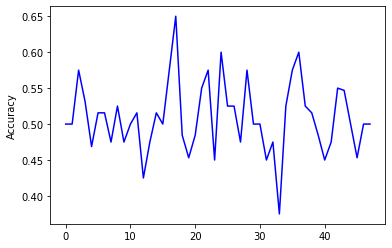

In [22]:
import matplotlib.pyplot as plt

plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], color = 'blue', label='Training Accuracy')